<a href="https://colab.research.google.com/github/dibyarupnath/CodeClause_Hand_Written_Digit_Recognization/blob/main/Handwritten_Digit_Recognition_Using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetching the required libraries

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## Fetching the MNIST dataset

In [ ]:
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Dividing the dataset and plotting some data

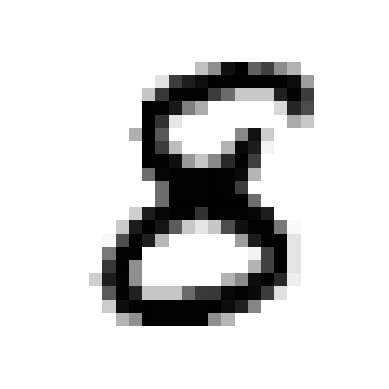

In [ ]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[3601]
some_digit_image = some_digit.reshape(28, 28)  # reshaping for plotting

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()


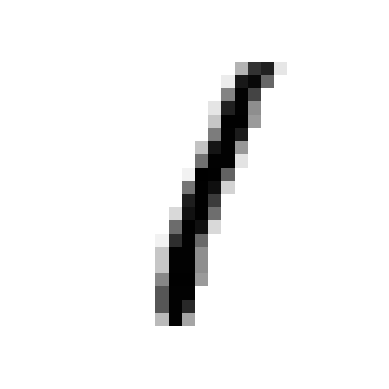

In [ ]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[3602]
some_digit_image = some_digit.reshape(28, 28)  # reshaping for plotting

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

## Checking an index without plotting

In [ ]:
y[3602]

'1'

## Splitting data into test and train sets

In [ ]:
x_train, x_test = x[0:6000], x[6000:7000]
y_train, y_test = y[0:6000], y[6000:7000]

# Creating a checker for the digit 5
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [ ]:
y_train

0       5
1       0
2       4
3       1
4       9
       ..
5995    7
5996    6
5997    8
5998    6
5999    9
Name: class, Length: 6000, dtype: int8

## Logistic Regression

In [ ]:
clf = LogisticRegression(tol=0.1, solver='lbfgs', max_iter=1000)  # Using 1000 max iters so that the algo can converge
clf.fit(x_train, y_train_5)
example = clf.predict([some_digit])
print(example)

[False]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Model Evaluation

In [ ]:
a = cross_val_score(clf, x_train, y_train_5, cv=3, scoring="accuracy")
print(a.mean())

# Getting an accuracy of almost 95%

0.9558333333333332
